# Fetching Data
Fetching MINST dataset and plotting the first image. 

In [1]:
%matplotlib inline

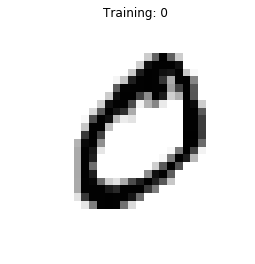

In [2]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Dataset downloader
from sklearn.datasets import fetch_mldata
# Working with datastructures such as matrix
import numpy as np
# Plot in python
import matplotlib.pyplot as plt
# Dirac delta for misclassification rate
from sympy.functions.special.delta_functions import DiracDelta
# plot the random forest
from sklearn.tree import export_graphviz
from subprocess import check_call
import pydot
import pydot_ng
from subprocess import check_call
# from tsne import bh_sne

# fetching MNIST dataset with fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="/Public/Drop_Box/Career/Research_Projects/DNN/Practical_Machine_Learning/\
data/MNIST/")

# reshape images to 28 * 28 in order to plot
images = [x.reshape(28,28) for x in mnist.data]
labels = mnist.target

# X_2d = bh_sne(images)
# rcParams['figure.figsize'] = 20, 20
# scatter(X_2d[:, 0], X_2d[:, 1], c=labels)

# plotting the first image
plt.axis('off')
plt.imshow(images[0], cmap=plt.cm.gray_r)
plt.title('Training: %i' % labels[0])
plt.show()
plt.close()
images = mnist.data

# Preprocessing
The first step in learning is preprocessing. This is step is carry out to
- Find and exclude the outliers, 
- Detect and remove effects of probable errors occured in data collection,
- And normalize the data in order to make the algorithms faster and more robust.

There are number of procedures in order to preprocess the data each of which are proper for a particular type of data. For MNIST data I prefered to use sklearn preprocessor **MaxAbsScaler** which is appropriate for *sparse* data.[[see this]](http://scikit-learn.org/stable/modules/preprocessing.html)

In [3]:
from sklearn.preprocessing import MaxAbsScaler
normalized_images = MaxAbsScaler().fit_transform(images)

# Partitioning the data
In every machine learning project the data shoud be splitted into a training set and a test set. Although there is no optimality about the relative size of these sets I chose 70-30 partition on the data.[[see this]](https://www.researchgate.net/post/Is_there_an_ideal_ratio_between_a_training_set_and_validation_set_Which_trade-off_would_you_suggest) The function **train_test_split** from sklearn.model_selection used to split the data.

In [4]:
from sklearn.model_selection import train_test_split
train_images , test_images , train_labels, test_labels = train_test_split(normalized_images, labels, test_size=0.3)

# Dimensionality reduction
In order to plot the classification in 2 dimensions we have to reduce dimensions of the data. I used PCA to this end. PCA from sklearn.decomposition is employed to do this. 

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
DR_data = pca.fit_transform(train_images)
print(DR_data[0,:])

[-1.67054348 -0.61978645]


(Skip this section!!!! ##todo)
# Cross-Validaiton
In order to tune the hyperparameteres of a model, a cross-validation should be applied on the data. I prefered to use k-fold (k=5) cross-validation to do the hyperparameter tuning. The function **StratifiedKFold** from sklearn.model_selection has been used in order to avoid different proportions of classes in folds.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score # the accuracy of the prediction
skf = StratifiedKFold(n_splits=5)
i = 0
for train_index, test_index in skf.split(train_images, train_labels):
    train_im[i], val_im[i] = train_images[train_index], train_images[test_index]
    train_lab[i], val_lab[i] = train_labels[train_index], train_labels[test_index]
    i += 1
    
def acc_fold(clf):
    acc_sum = 0
    for i in range(0,5):
        fit = clf.fit(train_im[i],train_lab[i])
        pred = fit.predict(val_im[i])
        

# Plot confusion matrix
In order to evaluate the classification I used confusion matrix. The code below generates a plot of the input confusion matrix.

In [ ]:
def plot_cnf(cnf_matrix, cnf_title):
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest')
    plt.title(cnf_title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, [str(x) for x in range(0,10)], rotation=45)
    plt.yticks(tick_marks, [str(x) for x in range(0,10)])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  
    plt.close()

# Generalized linear models
Fitting a linear model on data by multiplication of a weight vector to a measurement matrix.

## Simple logistic regression
Logistic regression is the simplest form of classification algorithms. It fits a linear model on data and put it in a euqation with a logit function which in some sense the probability of the data to belong to a specific class (it is a rough explanation for more details [see this](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)).<br />
Logistic regression is implemented as **LogisticRegression** function in sklearn.linear_model. The function has a parameter to set the type of penalty one may want to induce to the weights. I applied the logisitic regression in 3 fashions on the data: 
- one with no regularization term, 
- one with l1-norm normalizaiton 
- and one with l2 norm normalizaiton.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # the accuracy of the prediction
from sklearn.metrics import confusion_matrix # a matrix indicating the prediciton

# NO REGULARIZATION
# define the classifier
# regularization coefficient is set to 0
# solver is set to saga due to documentation advice on large number of samples
# multiclass is set to multinomial because of multiclasses
LR_clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0, fit_intercept=True,\
                   solver='saga',multi_class='multinomial',n_jobs=1) 
# fitting the model to training data
LR_fit = LR_clf.fit(train_images, train_labels)
# predicting the labels of test data
LR_pred = LR_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, LR_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "logistic regression with no regularization")
print("accuracy rate of logistic regression with no regularization: %d", accuracy_score(test_labels, ridge_pred))

# L1 REGULARIZATION
# define the classifier
# regularization coefficient is set to 0
# solver is set to saga due to documentation advice on large number of samples
# multiclass is set to multinomial because of multiclasses
Cs = np.arange(0.5,10,0.5) # defining the grid of search space
# defining the classifier using grid search to set the regularization strength
LR1_clf = GridSearchCV(estimator=LogisticRegression(penalty='l1', dual=False, tol=0.0001, fit_intercept=True,\
                   solver='saga',multi_class='multinomial'), param_grid=dict(C=Cs), n_jobs=2)

# fitting the model to training data
LR1_fit = LR1_clf.fit(train_images, train_labels)
# predicting the labels of test data
LR1_pred = LR1_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, LR1_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "logistic regression with l1 regularization")
print("accuracy rate of logistic regression with l1 regularization: %d", accuracy_score(test_labels, LR1_pred))

# L2 REGULARIZATION
# define the classifier
# regularization coefficient is set to 0
# solver is set to sag due to documentation advice on large number of samples
# multiclass is set to multinomial because of multiclasses
Cs = np.arange(0.5,10,0.5) # defining the grid of search space
LR2_clf = GridSearchCV(estimator=LogisticRegression(penalty='l1', dual=False, tol=0.0001, fit_intercept=True,\
                   solver='sag',multi_class='multinomial'), param_grid=dict(C=Cs), n_jobs=2) 
# fitting the model to training data
LR2_fit = LR2_clf.fit(train_images, train_labels)
# predicting the labels of test data
LR2_pred = LR2_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, LR2_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "logistic regression with l2 regularization")
print("accuracy rate of logistic regression with l2 regularization: %d", accuracy_score(test_labels, LR2_pred))


ZeroDivisionError: float division by zero

[ 5.  6.  6. ...,  9.  0.  9.]
[[-4.74197959 -6.10112587]
 [-4.72197959 -6.10112587]
 [-4.70197959 -6.10112587]
 ..., 
 [ 9.79802041  6.21887413]
 [ 9.81802041  6.21887413]
 [ 9.83802041  6.21887413]]


TypeError: text() missing 1 required positional argument: 's'

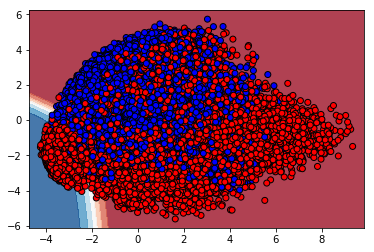

In [20]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
h = .02
x_min, x_max = DR_data[:, 0].min() - .5, DR_data[:, 0].max() + .5
y_min, y_max = DR_data[:, 1].min() - .5, DR_data[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


print(train_labels)
print(np.c_[xx.ravel(), yy.ravel()])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt_lda = LogisticRegression(penalty=None, dual=False, tol=0.0001, fit_intercept=True,\
                   solver='saga',multi_class='multinomial')
plt_lda.fit(DR_data, train_labels)
ax = plt
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = plt_lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot also the training points
ax.scatter(DR_data[:, 0], DR_data[:, 1], c=train_labels, cmap=cm_bright,\
           edgecolors='k')
# # and testing points
# ax.scatter(DR_data[:, 0], DR_data[:, 1], c=test_labels, cmap=cm_bright,\
#            edgecolors='k', alpha=0.6)
ax.text(xx.max() - .3, yy.min() + .3, size=15, horizontalalignment='right')
plt.tight_layout()
plt.show()

## Ridge classifier
Ridge classifier induces an L2 regularization on the coefficients of the linear model. [[see this]](http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf) The method has been implemented using **RidgeClassifier** from sklearn.linear_model.<br />
In order to find the best regularization strength (alpha) a cross-validation has been carried out. The function **RidgeClassifierCV** from sklearn.linear_model is used to do a cross-validation. I'd rather using 5-fold cross-validation according to [this](https://web.stanford.edu/~hastie/Papers/ESLII.pdf). However, there are several approches to apply cross-validation on data.

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import accuracy_score # the accuracy of the prediction
from sklearn.metrics import confusion_matrix # a matrix indicating the prediciton

# defining the ridge classifier
#grid search between 0.5 and 10 with step of size 0.5
ridge_clf = RidgeClassifierCV(alphas=np.arange(0.5, 10, 0.5), fit_intercept=True, cv=5) 
# fitting the model to training data
ridge_fit = ridge_clf.fit(train_images, train_labels)
# predicting the labels of test data
ridge_pred = ridge_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, ridge_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "ridge classification")
print("accuracy rate of ridge classification: %d", accuracy_score(test_labels, ridge_pred))

## L1 norm classifier
There is no implementation of lasso (l1 regulization) classifier in sklearn. Thus, I prefered to use a linear svm calssifier with l1 penalty. To this end, **LinearSVC** has been utilized from sklearn.svm. In order to find the regularizaiton hyperparameter **GridSearchCV** has been used from sklearn.model_selection.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score # impelent cross validation and find regularization hyperparameter
from sklearn.metrics import accuracy_score # the accuracy of the prediction
from sklearn.metrics import confusion_matrix # a matrix indicating the prediciton


Cs = np.arange(0.5,10,0.5) # defining the grid of search space
# defining the classifier using grid search to set the regularization strength
Linear_SVM_clf = GridSearchCV(estimator=LinearSVC(penalty='l1', loss='squared_hinge', dual=False,\
                      tol=0.0001, multi_class='multinomial', fit_intercept=True), param_grid=dict(C=Cs), n_jobs=2)



# fitting the model to training data
Linear_SVM_fit = Linear_SVM_clf.fit(train_images, train_labels)
# predicting the labels of test data
LS_pred = Linear_SVM_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, LS_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "Lasso classification")
print("accuracy rate of Lasso classification: %d", accuracy_score(test_labels, LS_pred))

## Elastic net classifier
We talked about linear models with l1- and l2-norm regularizaiton but what if we combine them? <br />
Elastic net is a linear combination of l1- and l2-norm.[[see this]](https://web.stanford.edu/~hastie/TALKS/enet_talk.pdf) It can somhow benefit both of the methods. Parameteres of **SGDClassifier** form sklearn.linear_model may be set to apply a Elastic net regularization on categorial data to carry out a classification (l1 and l2 are also implemented). 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score # impelent cross validation and find regularization hyperparameter
from sklearn.metrics import accuracy_score # the accuracy of the prediction
from sklearn.metrics import confusion_matrix # a matrix indicating the prediciton


alphas = np.arange(0.01,2,0.01) # defining the grid of search space
# defining the classifier using grid search to set the regularization strength
# penalty set to elasticnet
# ratio of l1 regularization is 0.15 
# learning rate is not constant
elasticnet_clf = GridSearchCV(estimator=SGDClassifier(loss='hinge', penalty='elastic-net', l1_ratio=0.15, fit_intercept=True,\
              n_jobs=3, learning_rate='optimal'), param_grid=dict(alpha=alphas), n_jobs=2)

# fitting the model to training data
elasticnet_fit = elasticnet_clf.fit(train_images, train_labels)
# predicting the labels of test data
elasticnet_pred = elasticnet_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, elasticnet_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "elasticnet classification")
print("accuracy rate of elasticnet classification: %d", accuracy_score(test_labels, elasticnet_pred))

## Perceptron
Perceptron is the first and most naive implementation of a nural network.[[see this]](https://web.stanford.edu/~hastie/TALKS/enet_talk.pdf) The point is the learning process which has several iterations and updates in the fitted weights.<br />
In sickit-learn the perceptron has been developed as **Perceptron** in sklearn.linear_model. Regularization is also available to add on perceptron. All four conditions has been implemented.

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, cross_val_score # impelent cross validation and find regularization hyperparameter
from sklearn.metrics import accuracy_score # the accuracy of the prediction
from sklearn.metrics import confusion_matrix # a matrix indicating the prediciton

# NO REGULARIZATION
prc = Perceptron(fit_intercept=True,n_jobs=2)
# fitting the model to training data
prc_fit = prc.fit(train_images, train_labels)
# predicting the labels of test data
prc_pred = prc_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, prc_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "perceptron")
print("accuracy rate of perceptron: %d", accuracy_score(test_labels, prc_pred))

# L1 REGULARIZATION
alphas = np.arange(0.01,2,0.01) # defining the grid of search space
# defining the classifier using grid search to set the regularization strength
# penalty set to elasticnet
# ratio of l1 regularization is 0.15 
# learning rate is not constant
prc_L1 = GridSearchCV(estimator=Perceptron(penalty = 'l1', fit_intercept=True,n_jobs=2), param_grid=dict(alpha=alphas), n_jobs=2)
# fitting the model to training data
prc_L1_fit = prc_L1.fit(train_images, train_labels)
# predicting the labels of test data
prc_L1_pred = prc_L1_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, prc_L1_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "perceptron with L1")
print("accuracy rate of perceptron with L1: %d", accuracy_score(test_labels, prc_L1_pred))

# L2 REGULARIZATION
alphas = np.arange(0.01,2,0.01) # defining the grid of search space
# defining the classifier using grid search to set the regularization strength
# penalty set to elasticnet
# ratio of l1 regularization is 0.15 
# learning rate is not constant
prc_L2 = GridSearchCV(estimator=Perceptron(penalty = 'l2', fit_intercept=True,n_jobs=2), param_grid=dict(alpha=alphas), n_jobs=2)
# fitting the model to training data
prc_L2_fit = prc_L2.fit(train_images, train_labels)
# predicting the labels of test data
prc_L2_pred = prc_L2_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, prc_L2_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "perceptron with L2")
print("accuracy rate of perceptron with L2: %d", accuracy_score(test_labels, prc_L2_pred))

# elasticnet REGULARIZATION
alphas = np.arange(0.01,2,0.01) # defining the grid of search space
# defining the classifier using grid search to set the regularization strength
# penalty set to elasticnet
# ratio of l1 regularization is 0.15 
# learning rate is not constant
prc_elastic = GridSearchCV(estimator=Perceptron(penalty = 'elasticnet', fit_intercept=True,n_jobs=2), param_grid=dict(alpha=alphas), n_jobs=2)
# fitting the model to training data
prc_elastic_fit = prc_elastic.fit(train_images, train_labels)
# predicting the labels of test data
prc_elastic_pred = prc_elastic_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, prc_elastic_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "perceptron with elasticnet")
print("accuracy rate of perceptron with elasticnet: %d", accuracy_score(test_labels, prc_elastic_pred))

## Passiveagressive classification

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score # impelent cross validation and find regularization hyperparameter
from sklearn.metrics import accuracy_score # the accuracy of the prediction
from sklearn.metrics import confusion_matrix # a matrix indicating the prediciton

Cs = np.arange(0.01,2,0.01) # defining the grid of search space
# defining the classifier using grid search to set the regularization strength
# penalty set to elasticnet
# ratio of l1 regularization is 0.15 
# learning rate is not constant
pac_clf = GridSearchCV(estimator=PassiveAggressiveClassifier(C=1.0, fit_intercept=True, loss='hinge'), param_grid=dict(C=Cs), n_jobs=2)
# fitting the model to training data
pac_clf_fit = pac_clf.fit(train_images, train_labels)
# predicting the labels of test data
pac_clf_pred = pac_clf_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, pac_clf_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "Passiveaggressive classification")
print("accuracy rate of Passiveaggressive classification: %d", accuracy_score(test_labels, pac_clf_pred))

# Discrement analysis
Given you have gaussian distributed multivariate data points and you want to classify the data by introducing linear or quadratic boundries in the feature space. LDA and QDA are aimed to find such boundries with a maximum likelihood approach.[[see this]](http://web.stanford.edu/class/stats202/content/lec9.pdf) 

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score # the accuracy of the prediction
from sklearn.metrics import confusion_matrix # a matrix indicating the prediciton

# LDA
# solver set to lsqr to benefit shrinkage
# shrinkage rate is set to auto to do the optimal one
# defining the classifier LDA
LDA = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
# fitting the model to training data
LDA_fit = LDA.fit(train_images, train_labels)
# predicting the labels of test data
LDA_pred = LDA_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, LDA_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "LDA")
print("accuracy rate of LDA: ", accuracy_score(test_labels, LDA_pred))

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


NameError: name 'plot_cnf' is not defined

[[-4.74197959 -6.10112587]
 [-4.72197959 -6.10112587]
 [-4.70197959 -6.10112587]
 ..., 
 [ 9.79802041  6.21887413]
 [ 9.81802041  6.21887413]
 [ 9.83802041  6.21887413]]


TypeError: text() missing 1 required positional argument: 's'

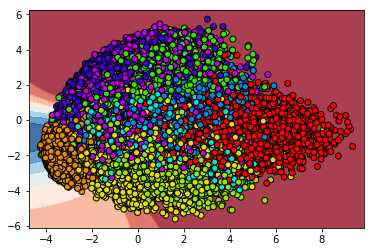

In [26]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
h = .02
x_min, x_max = DR_data[:, 0].min() - .5, DR_data[:, 0].max() + .5
y_min, y_max = DR_data[:, 1].min() - .5, DR_data[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))



print(np.c_[xx.ravel(), yy.ravel()])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#E58C00','#E5E200', '#9AE500',"#37E500", "#00E5CF", "#008AE5", "#4300E5", "#C200E5"])

plt_lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
plt_lda.fit(DR_data, train_labels)
ax = plt
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = plt_lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot also the training points
ax.scatter(DR_data[:, 0], DR_data[:, 1], c=train_labels, cmap=cm_bright,\
           edgecolors='k')
# # and testing points
# ax.scatter(DR_data[:, 0], DR_data[:, 1], c=test_labels, cmap=cm_bright,\
#            edgecolors='k', alpha=0.6)
ax.text(xx.max() - .3, yy.min() + .3, size=15, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score # the accuracy of the prediction
from sklearn.metrics import confusion_matrix # a matrix indicating the prediciton

# QDA
# defining the classifier QDA
QDA = QuadraticDiscriminantAnalysis()
# fitting the model to training data
QDA_fit = QDA.fit(train_images, train_labels)
# predicting the labels of test data
QDA_pred = QDA_fit.predict(test_images)
# defining the confusion matrix of the prediction
cnf_matrix = confusion_matrix(test_labels, QDA_pred)
# visualizing the confusion matrix
plot_cnf(cnf_matrix, "QDA")
print("accuracy rate of QDA: ", accuracy_score(test_labels, QDA_pred))

/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


NameError: name 'plot_cnf' is not defined

[ 5.  6.  6. ...,  9.  0.  9.]
[[-4.74197959 -6.10112587]
 [-4.72197959 -6.10112587]
 [-4.70197959 -6.10112587]
 ..., 
 [ 9.79802041  6.21887413]
 [ 9.81802041  6.21887413]
 [ 9.83802041  6.21887413]]


TypeError: text() missing 1 required positional argument: 's'

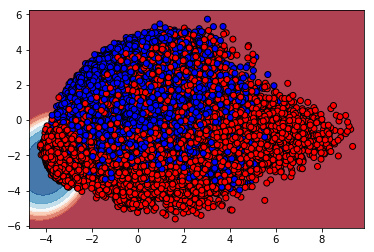

In [23]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
h = .02
x_min, x_max = DR_data[:, 0].min() - .5, DR_data[:, 0].max() + .5
y_min, y_max = DR_data[:, 1].min() - .5, DR_data[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


print(train_labels)
print(np.c_[xx.ravel(), yy.ravel()])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt_lda = QuadraticDiscriminantAnalysis()
plt_lda.fit(DR_data, train_labels)
ax = plt
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = plt_lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot also the training points
ax.scatter(DR_data[:, 0], DR_data[:, 1], c=train_labels, cmap=cm_bright,\
           edgecolors='k')
# # and testing points
# ax.scatter(DR_data[:, 0], DR_data[:, 1], c=test_labels, cmap=cm_bright,\
#            edgecolors='k', alpha=0.6)
ax.text(xx.max() - .3, yy.min() + .3, size=15, horizontalalignment='right')
plt.tight_layout()
plt.show()

# Random Forest Classifier
RandomForestClassifier function has been used to set the parameteres.
- The function "misclass" gets the max depth of the trees of the forest and returns the misclassification rate for 10-fold cross-validation.
- The funciton opt_param finds the optimal depth of the trees by a grid search. (optimal depth was 190 for a grid serach between 10 and 200 by step of length 10)
- The first classifer tree fitted on the training data has been plotted and the plot is saved in tree0.png.
- In order to find the best number of classifiers for this problem the out-of-bag error among the number of trees has been plotted. (optimal number of trees was 


In [ ]:
# Fits a random forest to the training data with maximum depth of m_depth and returns 
# the misclassification rate for 10-fold cross-validation
def misclass(m_depth):
    # Define Random Forest Classifier by setting the parameters
    # n_estimators : number of random trees
    # criterion : mesearement of feature importance 
    # max_depth : maximum depth of trees in the forest
    # min_samples_split : minimum number of samples in a split
    # min_samples_leaf : minimum number of samples in a leaf
    # min_weight_fraction_leaf : minimum weight of samples to be a leaf
    # n_jobs : number of cores dedicated
    # bootstrap : whether to use bootstrap for sampling or not
    # oob_score : whether to calculate out of box score or not
    # max_fetures : maximum fetures used for classification at each split
    # max_leaf_nodes : maximum number of leaf nodes
    # min_impurity_split : if the impurity of a node is more than this the node can be splited.
    # min_impurity_decrease : if the impurity of the nodes resulted from spliting a node is more than this the node can be splited.
    # warm_start : Whether to use previous model and add new estimators
    # random_state : seed of the random generator
    # verbose : ?
    
    # setting the parameters of the classifier
    rfclassifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=m_depth, min_samples_split=2, min_samples_leaf=20,\
                           min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,\
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,\
                           n_jobs=3, random_state=None, verbose=0, warm_start=False)
    mis_rate = 0
    # the following is a 10-fold cross-validation
    for x in range(0,10):
        min_ind = x * training_size // 10
        max_ind = (x + 1) * training_size // 10
        # validation data
        vd_img = training_images[min_ind:max_ind]
        vd_lab = training_labels[min_ind:]
        # training data
        tr_img = np.concatenate((training_images[:min_ind] , training_images[max_ind:]), axis = 0)
        tr_lab = np.concatenate((training_labels[:min_ind], training_labels[max_ind:]), axis = 0)
        # fitting the model to training data
        rfclassifier.fit(tr_img, tr_lab)
        # predicting the labels of validation data
        predicitons = rfclassifier.predict(vd_img)
        # computing misclassificaitons of validation data
        misclassifications = [(p_i - l_i == 0) for p_i, l_i in zip(predicitons, vd_lab)]
        mis_rate += sum(misclassifications) / 3500
    return 1- mis_rate / 10

# optimizer finder employing grid search between mini and maxi with grid width of step
def opt_param(mini, maxi, step):
    opt = 1
    for x in range(mini, maxi, step):
        if opt > misclass(x):
            opt = misclass(x)
            optx = x
    return optx

# fits a classifier with n_est trees to the training data
def rfclf(n_est):
    # A classifier description --> oob_score = True for future use in plotting
    clf = RandomForestClassifier(n_estimators=n_est, criterion='gini', max_depth= 190, min_samples_split=2, min_samples_leaf=20,\
                               min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,\
                               min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=True,\
                               n_jobs=3, random_state=None, verbose=0, warm_start=True)

    # Fitting the defined classifier
    clf.fit(training_images, training_labels)
    return clf
    
rf_clf = rfclf(100)

# plotting the first classifier tree
tree = rf_clf.estimators_[0]
export_graphviz(tree,
            filled=True,
            rounded=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree0.png')

# plotting out-of-bag error for different number of trees
oob_errors = []
for n in range(10, 1210,30):
    rf_clf = rfclf(n)
    oob_errors.append(1 - rf_clf.oob_score_)   
plt.plot(range(10, 1210,30), oob_errors, 'r')
plt.show()  

# Took about 30 mins on core i5 intel --> best number of trees =? 500 (best performance without overhead)



# Gradient Boosting


In [ ]:
# fits a classifier with n_est trees to the training data
def gbclf(n_est):
    # Defining a Gradient Boosting Classifier (many of parameters are the same as of RF classifier)
    # loss : Gradient Boosting (deviance) or Adaboost (exponential)
    # learning rate : rate of decrease in weight of residual fitted tree
    # subsample : fraction of data to be used if < 1 --> stochastic gradient descent
    # criterion :  “friedman_mse” for the mean squared error with improvement score by Friedman, “mse” for mean squared error, and “mae” for the mean absolute error. best is friedman!
    # init : ?
    # presort : whether to presort data in order to speedup the alg. best is auto!
    clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=n_est,\
                                       subsample=1.0, criterion='friedman_mse',\
                                       min_samples_split=2, min_samples_leaf=1,\
                                       min_weight_fraction_leaf=0.0, max_depth=3,\
                                       min_impurity_decrease=0.0, min_impurity_split=None,\
                                       init=None, random_state=None, max_features=None,\
                                       verbose=0, max_leaf_nodes=None, warm_start=False,\
                                       presort='auto')
    # Fitting the model
    clf.fit(training_images, training_labels)
    return clf

# Comparing the methods
Now we want to compare the methods in terms of misclassifications of test data. 

In [ ]:
# misclassification rate of Random Forest Classifier
rf_mis_rate = []
# misclassification rate of Gradient Boosting Classifier
gb_mis_rate = []
# between 10 and 1200 trees
for n in range(10, 1210,30):
    
    rf_clf = rfclf(n)
    rf_pred = rf_clf.predict(test_images)
    rf_mis = [(p_i - l_i == 0) for p_i, l_i in zip(rf_pred, test_labels)]
    rf_mis_rate.append(sum(rf_mis) / 3500)
    
    gb_clf = gbclf(n)
    gb_pred = gb_clf.predict(test_images)
    gb_mis = [(p_i - l_i == 0) for p_i, l_i in zip(gb_pred, test_labels)]
    gb_mis_rate.append(sum(gb_mis) / 3500)
    
plt.plot(range(10, 1210,30), rf_mis_rate , 'b', range(10, 1210,30), gb_mis_rate, 'r')
plt.show()

# took more than a hour!!!
